In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('House_selling.csv')   # Also try this code with excel sheet.

In [7]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Size of house (sqft)
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,7503


In [8]:
df.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Size of house (sqft)
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1357


# Task 1 part 2

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
#load the data set
data = pd.read_csv('House_selling.csv')
print(data.head()) #display first few rows
print(data.info())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

In [18]:
X = df[['Size of house (sqft)', 'price']]

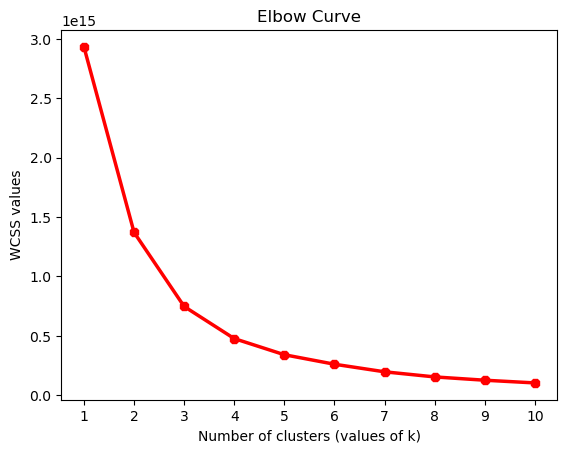

In [19]:
#using elbow method
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)
# the elbow curve
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")
plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [27]:
# taking k = 
k_means = KMeans(n_clusters=4, n_init="auto")
# fitting the input data
k_means.fit(X)
# predicting the labels of the input data
y_pred = k_means.predict(X)
# adding the labels to a column named label
df["label"] = y_pred
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Size of house (sqft),label
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,7639,3
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,5000,3
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,7503,0


C:\Users\lab\AppData\Local\Temp\ipykernel_41140\1143058600.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x="Size of house (sqft)", y="price", hue="label", palette=colors, legend="full", data=df, s=10)


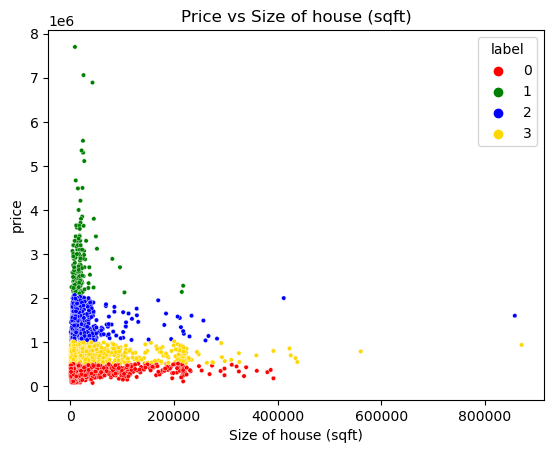

In [28]:
# scatterplot of the clusters using seaborn
colors = ["red", "green", "blue", "gold", "purple"]
sns.scatterplot(x="Size of house (sqft)", y="price", hue="label", palette=colors, legend="full", data=df, s=10)
plt.xlabel("Size of house (sqft)"), plt.ylabel("price")
plt.title("Price vs Size of house (sqft)")
plt.show()

# Task 1 part 1 

In [33]:
import pandas as pd
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def k_means_clustering(data, k, max_iters=100):
    centroids = data.sample(k, random_state=42).values

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for index, point in data.iterrows():
            distances = [euclidean_distance(point.values, centroid) for centroid in centroids]
            nearest_centroid_index = np.argmin(distances)
            clusters[nearest_centroid_index].append(point.values)

        new_centroids = []
        for cluster in clusters:
            if len(cluster) > 0:
                new_centroid = np.mean(cluster, axis=0)
                new_centroids.append(new_centroid)
            else:
                new_centroids.append(centroids[clusters.index(cluster)])

        if np.all(np.array(new_centroids) == centroids):
            break

        centroids = np.array(new_centroids)

    return clusters, centroids

data = pd.read_csv('House_selling.csv')

data = data.dropna()

data = data.select_dtypes(include=[np.number])

k = 4
clusters, centroids = k_means_clustering(data, k)

cluster_dfs = [pd.DataFrame(cluster, columns=data.columns) for cluster in clusters]
centroid_df = pd.DataFrame(centroids, columns=data.columns)

for i, cluster_df in enumerate(cluster_dfs):
    print(f"Cluster {i+1}:")
    print(cluster_df)

print("Centroids:")
print(centroid_df)


Cluster 1:
                id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     1.954401e+09  510000.0       3.0       2.00       1680.0    8080.0   
1     1.321400e+09  257500.0       3.0       2.25       1715.0    6819.0   
2     2.008000e+09  291850.0       3.0       1.50       1060.0    9711.0   
3     1.736801e+09  662500.0       3.0       2.50       3560.0    9796.0   
4     1.141015e+08  310000.0       3.0       1.00       1430.0   19901.0   
...            ...       ...       ...        ...          ...       ...   
5822  8.440010e+08  224000.0       3.0       1.75       1500.0   11968.0   
5823  2.630000e+08  360000.0       3.0       2.50       1530.0    1131.0   
5824  1.523300e+09  402101.0       2.0       0.75       1020.0    1350.0   
5825  2.913101e+08  400000.0       3.0       2.50       1600.0    2388.0   
5826  1.523300e+09  325000.0       2.0       0.75       1020.0    1076.0   

      floors  waterfront  view  condition  grade  sqft_above  sqft_basement 

# Task 2 Part 1 

In [ ]:
!pip install scikit-learn-extra

# Task 2 Part 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('House_Selling.csv')

data = data.dropna()

data_numeric = data.select_dtypes(include=[np.number])

wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=42)
    kmedoids.fit(data_numeric)
    wcss.append(kmedoids.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

optimal_k = 5
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(data_numeric)

data['Cluster'] = kmedoids.labels_
sns.pairplot(data=data, hue='Cluster', palette='Set1')
plt.show()
